# Time Series - Electricity Demand

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Import Data
# set date as index
dataFrame = pd.read_csv('../data/IPG2211A2N.csv', index_col=0)
# dataFrame = pd.read_csv('../data/IPG2211A2N.csv')
elecProd = dataFrame.copy()
elecProd.head()

IPG2211A2N
DATE                
1/1/1985     72.6803
2/1/1985     70.8479
3/1/1985     62.6166
4/1/1985     57.6106
5/1/1985     55.4467

In [3]:
# Convert index to datetime
elecProd.index = pd.to_datetime(elecProd.index)
# Rename Column
elecProd.columns = ['Energy Production']

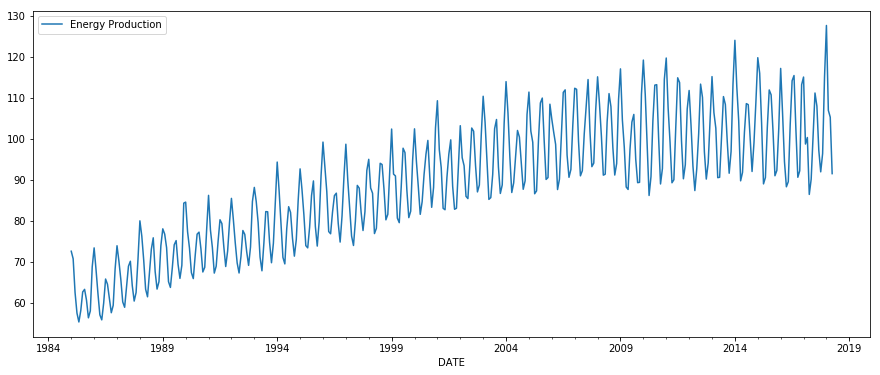

In [4]:
elecProd.plot(figsize=(15, 6))
plt.show()

In [21]:
# Explain TimeSeries and how to set pdq PDQ s

In [5]:
import warnings
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
# p -> Correlation with y for "p" period
# d -> Trend line character, degree of differencing
# q -> Error carry over

p = q = range(0, 3)

d = range(1,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [6]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(elecProd,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2028.0831455202938
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1841.7226866517265


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:1788.8638068119476
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1926.2449147516697


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1843.7113793309713


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:1787.2246785104708


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:1823.636042752181


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:1786.0290999031022


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:1783.7140564098652
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1981.6586771942127


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1799.080325045341


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:1748.741883705391


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:1890.648786046494


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1802.1868773271278


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:1746.6359485850223


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:1789.7822412794808


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:1744.8206273496135


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:1734.971917958554


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1935.5622048463779


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:1753.8059066681005


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:1705.4990355827313


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1851.8238860364863


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1757.8260357835934


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1701.5531286780706


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1744.4526064526822


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1704.671318306803


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1692.0474729166299
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2010.4692643327194


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1824.349202433014


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:1772.8055723883963
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1905.8073734725353


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1826.3404435945295


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:1771.6051109693335


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:1805.0158658490486


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:1764.226177819356


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:1765.5906922434233


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1930.0774586443213


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1751.8515871049744


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:1703.6492487564547


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:1835.983221960138


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1755.987384409394


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:1700.0584661236887


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:1733.497834559008


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:1695.1925911044432


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:1691.7625787857755


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:1927.470304242951


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:1748.5666588566771


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:1700.6521805509901


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:1837.7324664474093


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1750.5662645303548


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1697.0290507587792


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:1734.2107580218526


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:1696.1122081751096


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:1688.1797900354657
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1966.1965737510486


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:1799.7242466707726


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:1747.270498422675


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:1870.194669631352


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:1797.7866317949652


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1746.2783170341595


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1772.5115774330548


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1734.421042834252


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1735.0408066933155


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1931.9049992470884


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:1752.863475136026


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:1704.933288534021


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:1833.22277598666


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:1755.6835800144613


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:1701.5001903722891


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:1730.771132871877


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:1692.1501438931227


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:1693.1504897236327


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1921.9671889987342


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:1749.100103094413


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:1701.2588719371834


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:1830.484196522996


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:1753.4951520156533


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:1697.617491153911


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:1730.013043107002


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:1693.2097443420594


C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:1689.5142996683524


In [7]:
# Explain Model API
mod = sm.tsa.statespace.SARIMAX(elecProd,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

C:\Anaconda3\envs\DataScience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3537      0.107      3.292      0.001       0.143       0.564
ma.L1         -0.8142      0.108     -7.536      0.000      -1.026      -0.602
ma.L2         -0.1218      0.094     -1.300      0.194      -0.306       0.062
ar.S.L12       0.1605      0.161      0.996      0.319      -0.155       0.476
ar.S.L24      -0.3468      0.061     -5.667      0.000      -0.467      -0.227
ma.S.L12      -0.8702      0.169     -5.153      0.000      -1.201      -0.539
ma.S.L24       0.1978      0.142      1.391      0.164      -0.081       0.477
sigma2         5.9264      0.390     15.188      0.000       5.162       6.691


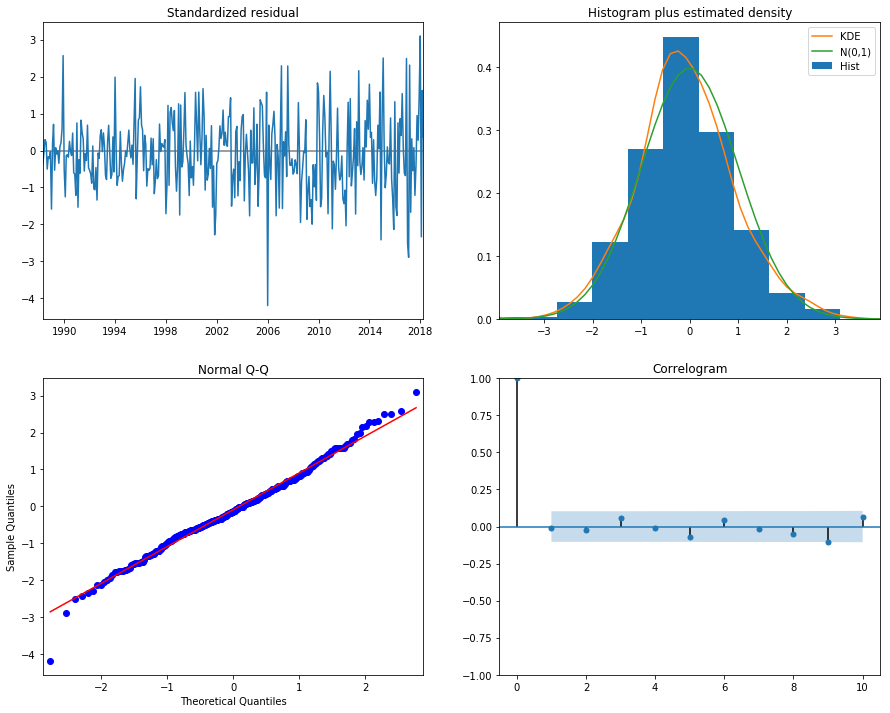

In [8]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Validate Forecast

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

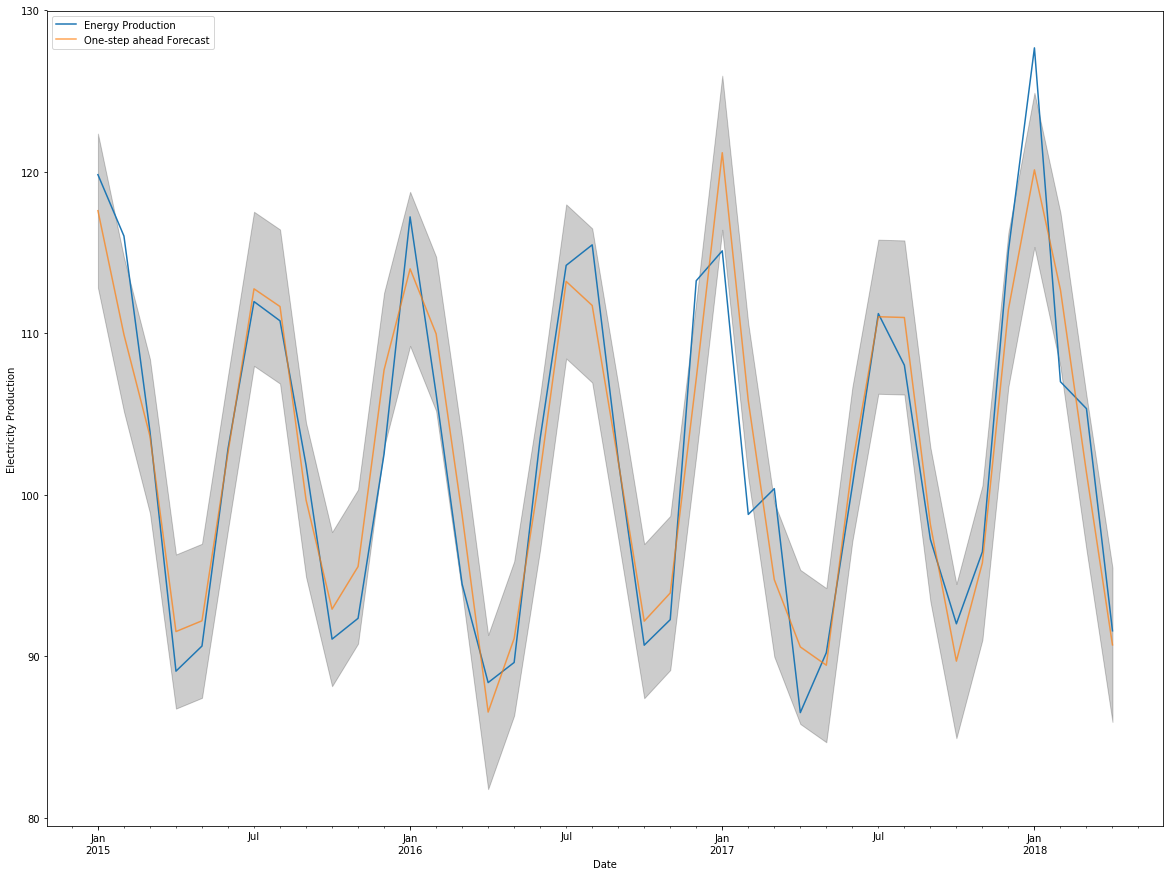

In [94]:
ax = elecProd['2015':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')
plt.legend()

plt.show()

In [66]:
y_forecasted = pred.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted.columns = ['Energy Production']
y_truth = elecProd['2015-01-01':]
# y_truth
# y_forecasted
# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Energy Production    11.97
dtype: float64


In [67]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

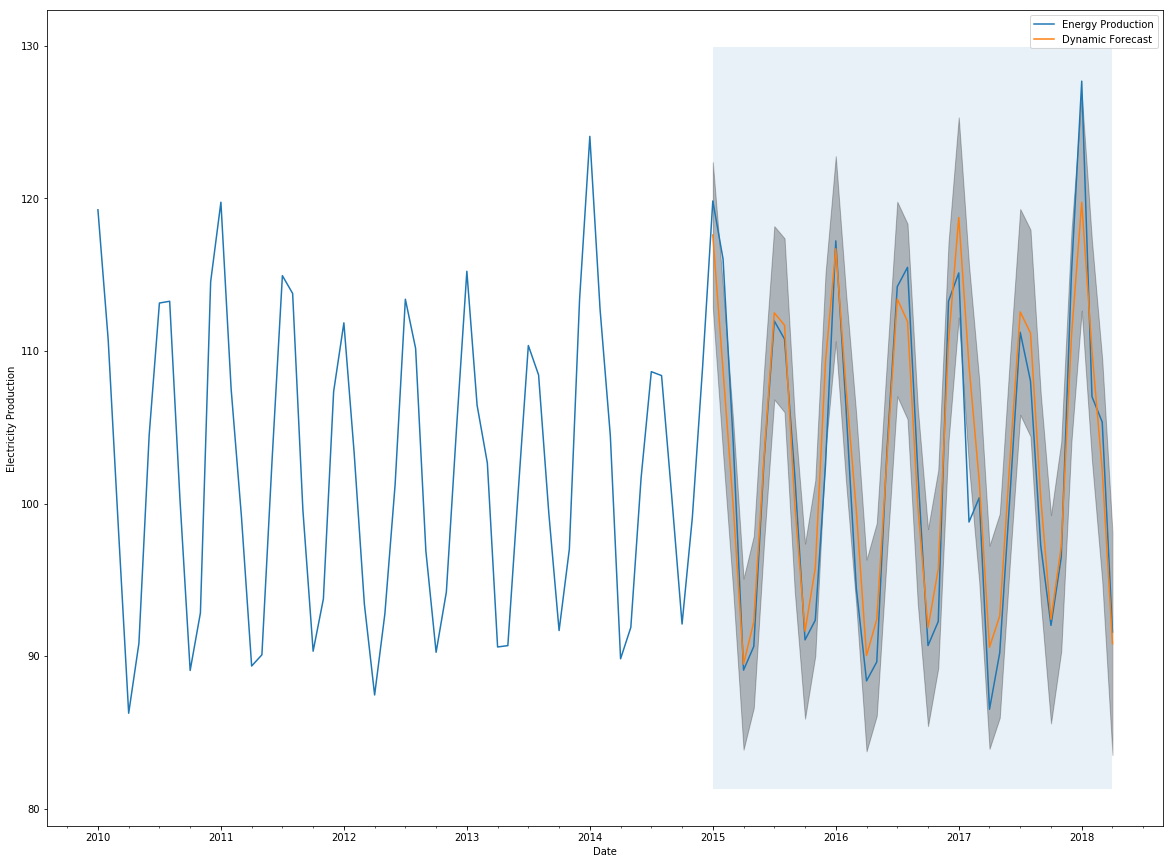

In [68]:
ax = elecProd['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), elecProd.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')

plt.legend()
plt.show()

In [69]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_forecasted = pd.DataFrame(y_forecasted)
y_forecasted.columns = ['Energy Production']
y_truth = elecProd['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is Energy Production    12.2
dtype: float64


In [76]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

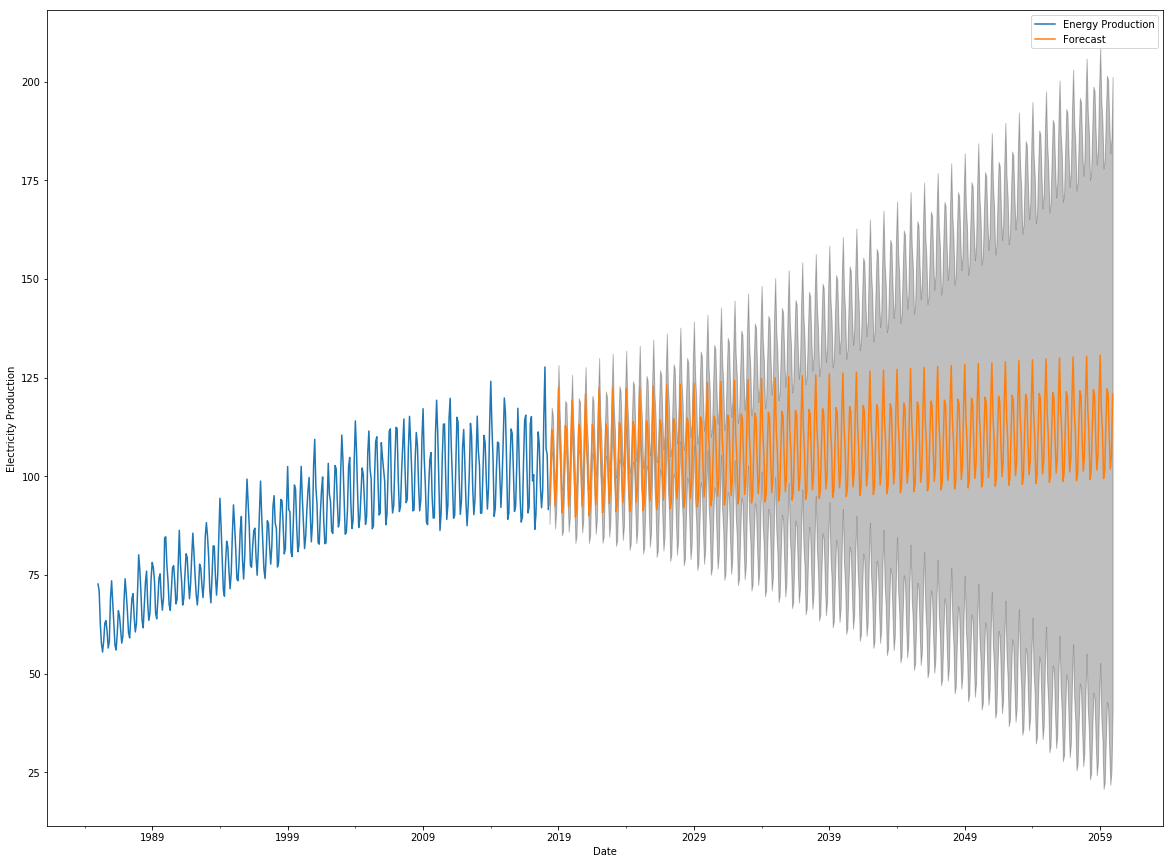

In [77]:
ax = elecProd.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Electricity Production')

plt.legend()
plt.show()